In [ ]:
# import dependencies for machine learning
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense



from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from collections import deque


In [ ]:
# import dependencies for math manipulation and files
import numpy as np
import pandas as pd
from numpy import loadtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from google.colab import files

In [ ]:
#import the file
uploaded = files.upload()

Saving dATA.csv to dATA (1).csv


In [ ]:
#create the dataframe
SNAP_df = pd.read_csv('dATA.csv', delimiter =",", usecols = ('COUNTIES','2010', '2011', '2012', '2013', '2014', '2015', '2016',
                                                                 '2017', '2018', '2019', '2020', '2021', '2022', 'INC', 'POP', 'LOW_STR%'),  nrows = 121)

print(SNAP_df[0:])

     COUNTIES    2010    2011    2012    2013    2014    2015    2016    2017  \
0    KENTUCKY  814405  843904  868920  843219  788613  692587  654877  628373   
1       ADAIR    3516    3704    3850    3707    3698    3285    3345    3218   
2       ALLEN    3817    3892    4094    3859    3536    3133    2878    2723   
3    ANDERSON    3025    3290    3064    2858    2538    2243    2316    2040   
4     BALLARD    1278    1395    1476    1403    1245    1071    1000    1015   
..        ...     ...     ...     ...     ...     ...     ...     ...     ...   
116     WAYNE    5502    5785    6051    5878    5631    4909    4895    4922   
117   WEBSTER    2215    2330    2303    2206    2139    1753    1678    1652   
118   WHITLEY   12110   12314   12664   12181   11468   10193    9621    9527   
119     WOLFE    3111    3114    3121    2940    2925    2541    2524    2483   
120  WOODFORD    2625    2909    3065    2928    2803    2457    2541    2170   

       2018    2019    2020

In [ ]:

training_x1 = (2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021)

county = input("Enter the row number for the county: ")
county = int(county)

print("Predicting Snap Recipients for given county in 2022")

SNAP_df['INDEX'] = (np.arange(1,122))
SNAP_df[:9]

SNAP_df.loc[county,'INC']
SNAP_df.loc[county,'POP']
SNAP_df.loc[county,'LOW_STR%']

training_SNAP_data_2 = np.loadtxt('dATA.csv', delimiter=',', skiprows = 1, usecols=(1,2,3,4,5,6,7,8,9,10,11,12))
training_SNAP_data_2

training_y1 = training_SNAP_data_2[county:county+1]
training_y1

#scale training data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range = (0, 1))

training_y1 = np.array(training_y1)

print(training_y1)


training_y1_length = len(training_y1)
training_y1 = np.reshape(training_y1, (12,1))

training_data_scaled = scale.fit_transform(training_y1)

print('Scaling Data...')
print(training_data_scaled)




ix_train, ix_test, iy_train, iy_test = train_test_split(training_data_scaled, training_x1, test_size=0.33)


X_train = []
y_train = []

print(training_data_scaled.shape[0])


predict_step = 10


for i in range(predict_step, training_data_scaled.shape[0]):
  X_train.append(training_data_scaled[i-predict_step:i, 0])
  y_train.append(training_data_scaled[i, 0])

print(ix_test)

#--------------------------- Shaping data for model -------------------------------------

print('Creating Training Data...')

#printing X_train, y_train
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

to_add = ix_train[:6,]
to_add.reshape(1,6)

ix_test = ix_test[0:6]
ix_test = np.append(ix_test, to_add)
print(ix_test)

ix_test = ix_test[0:10]
ix_test.shape



#--------------------------- Creating model -------------------------------------

model = Sequential()
#original
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer='normal'))

print('Creating Model...')

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

print('Compiling Model...')
model.fit(X_train, y_train, epochs = 20, verbose=0, batch_size = 4, shuffle=True)


#--------------------------- Creating testing sets model -------------------------------------

X_test = []
y_test = []

years_ahead = 1
# training_data_scaled
for i in range(predict_step, training_data_scaled.shape[0]):
  X_test.append(training_data_scaled[i-predict_step:i, 0])


for i in range(predict_step, predict_step+ years_ahead):
  X_test.append(ix_test[i-predict_step:i+4])

print('Creating testing Data...')

X_test = np.array(X_test)

print(X_test)

print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("BEFORE PREDICT XTEST SHAPE : " + str(X_test.shape))





predicted_recipient_count = model.predict(X_test)

print('Running Model...')

predicted_recipient_count = predicted_recipient_count.reshape(-1, 1)
print('after reshape .. predicted_recipient_count..')
print(predicted_recipient_count[:3])
predicted_recipient_count = scale.inverse_transform(predicted_recipient_count)
print('after invert..predicted_stock_price..')





X_test = X_test.reshape(-1,1)
X_test = scale.inverse_transform(X_test)

print(predicted_recipient_count.shape)
print(X_test.shape)

predicted_recipient_count = np.array(predicted_recipient_count)
predicted_recipient_count = predicted_recipient_count[0]
predicted_recipient_count = int(predicted_recipient_count)
print("INITIAL MODEL")
print(predicted_recipient_count)

#--------------------------- model boosting -------------------------------------


model_boost = linear_model.LinearRegression()
model_boost.fit(SNAP_df[['2020', 'INC', 'POP', 'LOW_STR%']], SNAP_df['2021'])

county_inc = SNAP_df.loc[county,'INC']
county_pop = SNAP_df.loc[county,'POP']
county_risk = SNAP_df.loc[county,'LOW_STR%']

X = (predicted_recipient_count, county_inc, county_pop, county_risk)
X = np.array(X)
X = X.reshape(1,-1)

print("RUNNING BOOSTED MODEL")

finalz = model_boost.predict(X)
predicted_boosted_count = int(finalz)
print(predicted_boosted_count)

final_predicted_recipient_count = int((predicted_boosted_count+predicted_recipient_count)/2)
print("TEST")
print(final_predicted_recipient_count)
county_2021 = SNAP_df.loc[county,'2021']

# -------------------------- Conditions -------------------------------------

if(county_2021<2000):
  print("FINAL")
  finalll = predicted_recipient_count
  print(finalll)
elif(county_2021>7000):
  print("FINAL")
  finalll = final_predicted_recipient_count
  print(finalll)
elif(county_2021>3000):
  print("FINAL")
  finalll = predicted_boosted_count
  print(finalll)
else:
  print("FINAL")
  finalll = final_predicted_recipient_count
  print(finalll)


Enter the row number for the county: 1
Predicting Snap Recipients for given county in 2022
[[3516. 3704. 3850. 3707. 3698. 3285. 3345. 3218. 2803. 2780. 3481. 3048.]]
Scaling Data...
[[0.68785047]
 [0.8635514 ]
 [1.        ]
 [0.86635514]
 [0.85794393]
 [0.47196262]
 [0.52803738]
 [0.40934579]
 [0.02149533]
 [0.        ]
 [0.65514019]
 [0.25046729]]
12
[[1.        ]
 [0.02149533]
 [0.52803738]
 [0.8635514 ]]
Creating Training Data...
[1.         0.02149533 0.52803738 0.8635514  0.68785047 0.65514019
 0.         0.40934579 0.85794393 0.47196262]
Creating Model...
Compiling Model...
Creating testing Data...
[[0.68785047 0.8635514  1.         0.86635514 0.85794393 0.47196262
  0.52803738 0.40934579 0.02149533 0.        ]
 [0.8635514  1.         0.86635514 0.85794393 0.47196262 0.52803738
  0.40934579 0.02149533 0.         0.65514019]
 [1.         0.02149533 0.52803738 0.8635514  0.68785047 0.65514019
  0.         0.40934579 0.85794393 0.47196262]]
(3, 10)
BEFORE PREDICT XTEST SHAPE : (3, 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Plotting...


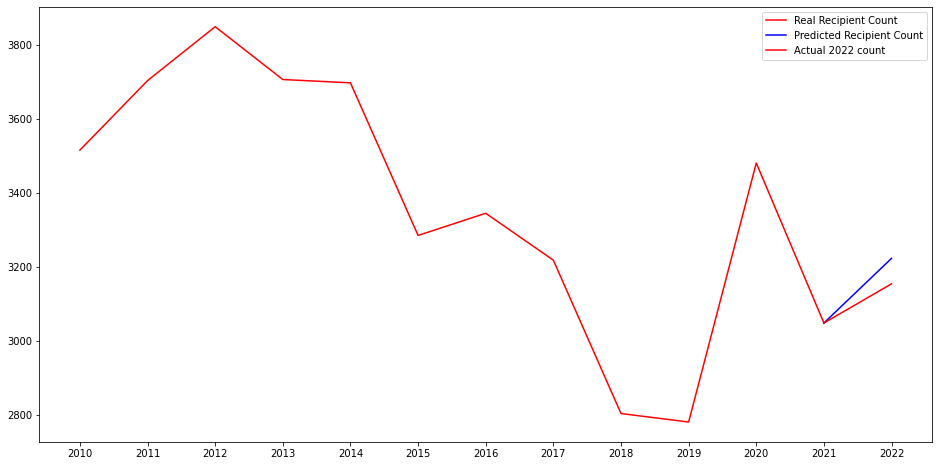

In [ ]:
#--------------------------- Plotting (final) -------------------------------------
print('Plotting...')

# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.figure(figsize = (16,8))
last_of_y = int(training_y1[len(training_y1)-1])
y_forplot = (last_of_y, finalll)

x_axis_marks = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
small_markers = ['2021', '2022']
plt.plot(x_axis_marks, training_y1, color = 'red', label = 'Real Recipient Count')
plt.plot(small_markers, y_forplot, color = 'blue', label = 'Predicted Recipient Count')


actual_2022 = SNAP_df['2022'][county]
actual_forplot = (last_of_y, actual_2022)
plt.plot(small_markers, actual_forplot, color = 'red', label = 'Actual 2022 count')
#plt.xticks(training_x1, x_axis_marks)

#plt.xticks(predicted_recipient_count, x_axis_marks)
plt.legend()
plt.show()